In [1]:
import pandas as pd
import numpy as np
import os
import datetime as datetime

import h2o

#h2o.init()
#h2o.cluster().shutdown()

In [2]:
# read in prepared data set
df = pd.read_csv("data/energy-df-sample.csv")
df.head()

,Unnamed: 0,date,hour,LCLid,kw,visibility,windBearing,temperature,timestamp,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,time
0,5,2011-11-24,0,MAC000150,0.386,8.88,217,9.01,2011-11-24 00:00:00,8.33,1029.52,7.37,2.92,rain,clear-night,0.96,Clear,00:00:00
1,18,2011-11-24,1,MAC000150,0.362,9.91,222,8.99,2011-11-24 01:00:00,8.04,1029.40,7.51,2.67,rain,clear-night,0.94,Clear,01:00:00
2,31,2011-11-24,2,MAC000150,0.314,9.27,215,8.56,2011-11-24 02:00:00,7.97,1029.38,7.01,2.65,rain,clear-night,0.96,Clear,02:00:00
3,44,2011-11-24,3,MAC000150,0.272,8.21,221,9.03,2011-11-24 03:00:00,8.36,1029.18,7.32,3.05,rain,clear-night,0.96,Clear,03:00:00
4,57,2011-11-24,4,MAC000150,0.160,8.93,215,8.78,2011-11-24 04:00:00,8.19,1028.89,7.01,3.06,rain,clear-night,0.96,Clear,04:00:00


In [3]:
df.dtypes

Unnamed: 0               int64
date                    object
hour                     int64
LCLid                   object
kw                     float64
visibility             float64
windBearing              int64
temperature            float64
timestamp               object
dewPoint               float64
pressure               float64
apparentTemperature    float64
windSpeed              float64
precipType              object
icon                    object
humidity               float64
summary                 object
time                    object
dtype: object

In [13]:
df.describe()

,Unnamed: 0,hour,kw,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity
count,7.537044e+06,7.537044e+06,7.537044e+06,7.537044e+06,7.537044e+06,7.537044e+06,7.537044e+06,7.532019e+06,7.537044e+06,7.537044e+06,7.537044e+06
mean,4.182161e+07,1.150000e+01,4.095918e-01,1.129389e+01,1.946105e+02,1.095995e+01,6.943602e+00,1.012928e+03,9.771112e+00,3.920510e+00,7.793662e-01
std,2.398073e+07,6.921421e+00,5.233118e-01,2.979581e+00,9.063776e+01,6.051650e+00,5.216690e+00,1.089403e+01,7.254506e+00,2.031798e+00,1.422170e-01
min,5.000000e+00,0.000000e+00,0.000000e+00,2.700000e-01,0.000000e+00,-5.640000e+00,-9.980000e+00,9.757400e+02,-8.880000e+00,4.000000e-02,2.300000e-01
25%,2.103821e+07,6.000000e+00,1.150000e-01,1.036000e+01,1.210000e+02,6.580000e+00,3.030000e+00,1.006740e+03,3.990000e+00,2.440000e+00,7.000000e-01
50%,4.186703e+07,1.100000e+01,2.360000e-01,1.226000e+01,2.150000e+02,1.053000e+01,7.120000e+00,1.013690e+03,1.053000e+01,3.690000e+00,8.100000e-01
75%,6.259299e+07,1.700000e+01,4.820000e-01,1.308000e+01,2.540000e+02,1.526000e+01,1.106000e+01,1.020280e+03,1.526000e+01,5.100000e+00,8.900000e-01
max,8.325399e+07,2.300000e+01,1.117300e+01,1.609000e+01,3.590000e+02,3.240000e+01,1.988000e+01,1.043320e+03,3.242000e+01,1.480000e+01,1.000000e+00


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df["sensor_id"] = df["LCLid"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7537044 entries, 0 to 7537043
Data columns (total 19 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Unnamed: 0           int64         
 1   date                 object        
 2   hour                 int64         
 3   LCLid                object        
 4   kw                   float64       
 5   visibility           float64       
 6   windBearing          int64         
 7   temperature          float64       
 8   timestamp            datetime64[ns]
 9   dewPoint             float64       
 10  pressure             float64       
 11  apparentTemperature  float64       
 12  windSpeed            float64       
 13  precipType           object        
 14  icon                 object        
 15  humidity             float64       
 16  summary              object        
 17  time                 object        
 18  sensor_id            object        
dtypes: datetime64[ns](1),

# Sample Visualizations

In [16]:
ids = pd.DataFrame(df['sensor_id'].unique())
ids.columns = ['id']
ids.shape

(500, 1)

<AxesSubplot:xlabel='timestamp', ylabel='kw'>

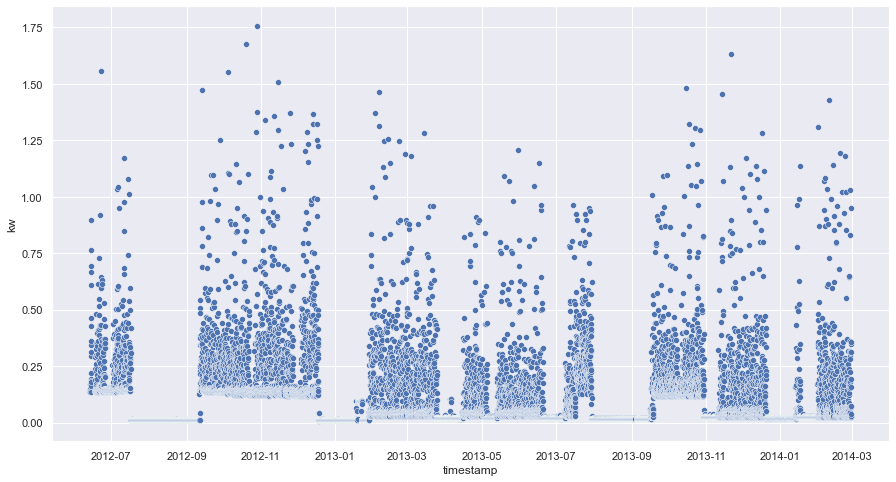

In [17]:
id = ids.sample(1)
local_df = df.loc[df['sensor_id'].isin(id["id"])]
local_df.head()

# Visualize Temperature * Load Relationship 
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = local_df, x = "timestamp", y = "kw")

In [33]:
from datetime import timedelta
max = df['timestamp'].agg("max")
print(max)

test_beg = max - timedelta(hours = 24 * 7)
test_end = max

print(f'Testing Period Begins: {test_beg}')
print(f'Testing Period End: {test_end}')


df[df['timestamp'] < test_beg].to_csv("data/train.csv")
df[df['timestamp'] >= test_beg].to_csv("data/test.csv")
#train_df.to_csv("data/train.csv", date_format = '%Y-%m-%d %H:%M:%S')


2014-02-27 23:00:00
Testing Period Begins: 2014-02-20 23:00:00
Testing Period End: 2014-02-27 23:00:00


In [19]:
# Prepare data set for modeling
# Set Seed
seed = 1234

# Read in Relevant Data
hdf = h2o.H2OFrame(df.drop(['Unnamed: 0', 'date', 'LCLid', 'time'], axis = 1))

# Cast all categoricals as factors
cat_cols = [
    'hour', 'sensor_id', 'precipType', 'icon', 'summary'
]

hdf[cat_cols] = hdf[cat_cols].asfactor()

response = 'kw'
print(f'Response Variable: {response}')

# Check Distribution of Response Variable
#print(hdf[response].table())

# For k_fold strategy we need to provide fold column
fold_column = "kfold_column"
hdf[fold_column] = hdf.kfold_column(n_folds=5, seed=seed)

# Split the dataset into train and test
#train, test = hdf.split_frame(ratios = [.8], seed = 1234)
train = hdf[hdf['timestamp'] < test_beg]
test = hdf[hdf['timestamp'] >= test_beg]

# Identify Predictors
predictors = train.drop(['kw', 'kfold_column']).columns
print(f'Explanatory Variables: {predictors}')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Response Variable: kw
Explanatory Variables: ['hour', 'visibility', 'windBearing', 'temperature', 'timestamp', 'dewPoint', 'pressure', 'apparentTemperature', 'windSpeed', 'precipType', 'icon', 'humidity', 'summary', 'sensor_id']


In [44]:
# Automatic Load Forecasting Model

from h2o.automl import H2OAutoML

# Run AutoML for 20 base models
aml = H2OAutoML(max_models = 10, seed = 1234, max_runtime_secs = 60*2)
aml.train(x = predictors, y = response, training_frame = train, validation_frame = test)

# View the AutoML Leaderboard
lead_board = aml.leaderboard
lead_board.head(rows = lead_board.nrows)  


AutoML progress: |
14:03:17.879: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
14:03:17.889: AutoML: XGBoost is not available; skipping it.
14:03:17.903: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
14:03:17.903: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████
14:04:48.469: GBM_1_AutoML_1_20211221_140317 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20211221_140317_cv_1.  Details: ERRR on field: _ntrees: The tree model will not fit in the driver node's memory (197.9 KB per tree x 10000 > 1.29 GB) - try decreasing ntrees and/or max_depth or increasing min_rows!


████████████████| (d

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_1_AutoML_1_20211221_140317,0.172819,0.415715,0.172819,0.245831,0.212428


In [53]:
# Peak Demand Forecasting Model
h2o.cluster().shutdown()

In [54]:
import gc
gc.collect()

0

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'/Users/jfarland/Documents/products/wave/wave-apps/load_forecasting_h2o'

In [4]:
df = pd.read_csv("/Users/jfarland/Documents/research/london-smart-meters/data/energy-df.csv")

In [5]:
df.head()

,Unnamed: 0,date,hour,LCLid,kw,visibility,windBearing,temperature,timestamp,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,time
0,0,2011-11-24,0,MAC000145,0.252,8.88,217,9.01,2011-11-24 00:00:00,8.33,1029.52,7.37,2.92,rain,clear-night,0.96,Clear,00:00:00
1,1,2011-11-24,0,MAC000146,0.187,8.88,217,9.01,2011-11-24 00:00:00,8.33,1029.52,7.37,2.92,rain,clear-night,0.96,Clear,00:00:00
2,2,2011-11-24,0,MAC000147,0.451,8.88,217,9.01,2011-11-24 00:00:00,8.33,1029.52,7.37,2.92,rain,clear-night,0.96,Clear,00:00:00
3,3,2011-11-24,0,MAC000148,0.096,8.88,217,9.01,2011-11-24 00:00:00,8.33,1029.52,7.37,2.92,rain,clear-night,0.96,Clear,00:00:00
4,4,2011-11-24,0,MAC000149,0.136,8.88,217,9.01,2011-11-24 00:00:00,8.33,1029.52,7.37,2.92,rain,clear-night,0.96,Clear,00:00:00


In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df["month"] = df["date"].dt.month

In [34]:
df_agg = df.groupby(["month", "LCLid"]).agg(
    kwh = ('kw', 'sum'),
    temp = ('temperature', 'mean'))

In [35]:
df_agg.reset_index(inplace=True)


In [39]:
df_agg.to_csv("/Users/jfarland/Documents/research/london-smart-meters/data/monthly-df.csv")

In [40]:
preds = [0.1, 0.2, 0.3]
pd.DataFrame({'forecast': preds})

,forecast
0,0.1
1,0.2
2,0.3


In [9]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
test_df.head()

,Unnamed: 0,Unnamed: 0.1,date,hour,LCLid,kw,visibility,windBearing,temperature,timestamp,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,time,sensor_id
0,7459400,82414112,2014-02-20,23,MAC000002,0.942,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000002
1,7459401,82414119,2014-02-20,23,MAC000010,0.842,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000010
2,7459402,82414148,2014-02-20,23,MAC000041,0.834,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000041
3,7459403,82414167,2014-02-20,23,MAC000061,0.494,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000061
4,7459404,82414173,2014-02-20,23,MAC000069,0.115,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000069


In [7]:
preds = test_df["kw"]
test_df = pd.concat([pd.DataFrame({'kw': preds}), test_df.drop("kw", axis = 1)], axis = 1)
test_df.head()

,kw,Unnamed: 0,Unnamed: 0.1,date,hour,LCLid,visibility,windBearing,temperature,timestamp,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,time,sensor_id
0,0.942,7459400,82414112,2014-02-20,23,MAC000002,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000002
1,0.842,7459401,82414119,2014-02-20,23,MAC000010,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000010
2,0.834,7459402,82414148,2014-02-20,23,MAC000041,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000041
3,0.494,7459403,82414167,2014-02-20,23,MAC000061,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000061
4,0.115,7459404,82414173,2014-02-20,23,MAC000069,14.0,229,6.34,2014-02-20 23:00:00,3.68,1001.06,3.95,3.26,rain,partly-cloudy-night,0.83,Partly Cloudy,23:00:00,MAC000069


In [37]:
from h2o_wave import main, app, Q, ui, data
from h2o_wave_ml import build_model, ModelType
h2o.cluster().shutdown()

H2O session _sid_a60e closed.


In [38]:
# train WaveML Model using H2O-3 AutoML
wave_model = build_model(
    train_df = train_df,
    target_column = 'kw',
    feature_columns = ["hour", "LCLid", "temperature"],
    model_type = ModelType.H2O3,
    _h2o3_max_runtime_secs = 60*5,
    _h2o3_nfolds = 1
)

H2OConnectionError: Connection was closed, and can no longer be used.

In [ ]:
import gc
gc.collect()

11

In [31]:
print(wave_model.model)
# 'build',
# 'endpoint_url',
# 'ensure',
# 'get',
# 'model',
# 'predict',
# 'project_id',
# 'type'

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_2_20211223_214353


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Ridge ( lambda = 1.726E-5 ),"nlambda = 30, lambda.max = 10.721, lambda.min = 1.726E-5, lambda.1...",1036,1036,29,AutoML_2_20211223_214353_training_Key_Frame__upload_9e9be6b38d745b...




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.17691469015577715
RMSE: 0.420612280081998
MAE: 0.24867008445116695
RMSLE: 0.21502120258743684
R^2: 0.35365689914328735
Mean Residual Deviance: 0.17691469015577715
Null degrees of freedom: 7459399
Residual degrees of freedom: 7458363
Null deviance: 2041759.922862601
Residual deviance: 1319677.439748004
AIC: 8250601.653941843

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.1772222406409671
RMSE: 0.42097771988665517
MAE: 0.24891262496355412
RMSLE: 0.21522569245076437
R^2: 0.3525332890343962
Mean Residual Deviance: 0.1772222406409671
Null degrees of freedom: 7459399
Residual degrees of freedom: 7458363
Null deviance: 2041832.4362180172
Residual deviance: 1321971.58183723
AIC: 8263557.900333977

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,mae,0.248893,0.001566,0.248531,0.248625,0.247343,0.251074
1,mean_residual_deviance,0.177217,0.002214,0.177188,0.176333,0.175076,0.180272
2,mse,0.177217,0.002214,0.177188,0.176333,0.175076,0.180272
3,null_deviance,510458.100000,9720.599000,505466.500000,514284.840000,500012.600000,522068.500000
4,r2,0.352443,0.006998,0.346288,0.360597,0.346940,0.355947
5,residual_deviance,330483.750000,4128.363300,330428.970000,328835.030000,326490.030000,336181.030000
6,rmse,0.420966,0.002625,0.420937,0.419920,0.418421,0.424585
7,rmsle,0.215205,0.000593,0.215097,0.214963,0.214700,0.216059



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_deviance,training_mae,training_r2
0,,2021-12-23 21:46:05,0.000 sec,1,.11E2,1037,0.269210,0.270146,0.002580,0.0,NaN,,,,
1,,2021-12-23 21:46:06,0.305 sec,2,.67E1,1037,0.267361,0.268539,0.002566,0.0,NaN,,,,
2,,2021-12-23 21:46:06,0.498 sec,3,.41E1,1037,0.265218,0.266555,0.002546,0.0,NaN,,,,
3,,2021-12-23 21:46:06,0.728 sec,4,.26E1,1037,0.263011,0.264357,0.002519,0.0,NaN,,,,
4,,2021-12-23 21:46:06,1.007 sec,5,.16E1,1037,0.261024,0.262211,0.002486,0.0,NaN,,,,
5,,2021-12-23 21:46:06,1.135 sec,6,.99E0,1037,0.259411,0.260367,0.002450,0.0,NaN,,,,
6,,2021-12-23 21:46:07,1.568 sec,7,.61E0,1037,0.258136,0.258909,0.002415,0.0,NaN,,,,
7,,2021-12-23 21:46:07,1.770 sec,8,.38E0,1037,0.257002,0.257728,0.002382,0.0,NaN,,,,
8,,2021-12-23 21:46:07,2.029 sec,9,.24E0,1037,0.255738,0.256590,0.002353,0.0,NaN,,,,
9,,2021-12-23 21:46:08,2.260 sec,10,.15E0,1037,0.254031,0.255208,0.002328,0.0,NaN,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LCLid.MAC004593,1.133324,1.000000,0.010695
1,sensor_id.MAC004593,1.065459,0.940118,0.010054
2,LCLid.MAC001224,0.586950,0.517901,0.005539
3,sensor_id.MAC001224,0.541823,0.478083,0.005113
4,LCLid.MAC000693,0.531786,0.469227,0.005018
5,sensor_id.MAC000693,0.501281,0.442311,0.004730
6,LCLid.MAC005442,0.488681,0.431193,0.004611
7,LCLid.MAC005346,0.482534,0.425768,0.004553
8,LCLid.MAC004778,0.478186,0.421932,0.004512
9,sensor_id.MAC005442,0.460773,0.406568,0.004348



See the whole table with table.as_data_frame()



In [ ]:
check = wave_model.predict(test_df)

H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/PostFile (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fa6d6e35130>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [40]:
h2o.cluster().shutdown()

In [6]:
import os 

os.getcwd()

'/Users/jfarland/Documents/products/wave/wave-apps/load_forecasting_h2o'

In [9]:
train_df = pd.read_csv("data/train.csv")


In [22]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])

train_agg = (train_df.drop("sensor_id", axis = 1).groupby(["timestamp", "date", "hour"])
    .agg(
        kw = ("kw", 'mean'),
        temperature = ("temperature", 'mean'),
        humidity = ("humidity", 'mean'),
        dewPoint = ("dewPoint", 'mean'),
        visibility = ("visibility", 'mean'),
        windBearing = ("windBearing", 'mean'),
        windSpeed = ("windSpeed", 'mean'),
        pressure = ("pressure", 'mean')
    ))
train_agg.reset_index(inplace = True)
train_agg["label"] = "historical"
train_agg["timestamp"] = train_agg.index.astype(str) # cast back to string for JSON serialization :( ...

train_agg_lim = train_agg[["kw", "label", "timestamp"]]
train_agg_lim.columns = ['kw', 'label','timestamp']

train_agg.head()

,timestamp,date,hour,kw,temperature,humidity,dewPoint,visibility,windBearing,windSpeed,pressure,label
0,0,2011-11-24,0,0.386,9.01,0.96,8.33,8.88,217.0,2.92,1029.52,historical
1,1,2011-11-24,1,0.362,8.99,0.94,8.04,9.91,222.0,2.67,1029.40,historical
2,2,2011-11-24,2,0.314,8.56,0.96,7.97,9.27,215.0,2.65,1029.38,historical
3,3,2011-11-24,3,0.272,9.03,0.96,8.36,8.21,221.0,3.05,1029.18,historical
4,4,2011-11-24,4,0.160,8.78,0.96,8.19,8.93,215.0,3.06,1028.89,historical


In [23]:
train_agg_lim = train_agg[["kw", "label", "timestamp"]]
train_agg_lim.head()

,kw,label,timestamp
0,0.386,historical,0
1,0.362,historical,1
2,0.314,historical,2
3,0.272,historical,3
4,0.160,historical,4


In [24]:
train_agg_lim.columns = ['kw', 'label','timestamp']
train_agg_lim.head()

,kw,label,timestamp
0,0.386,historical,0
1,0.362,historical,1
2,0.314,historical,2
3,0.272,historical,3
4,0.160,historical,4


In [29]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])

train_agg = (train_df.drop("sensor_id", axis = 1).groupby(["timestamp", "date", "hour"])
    .agg(
        kw = ("kw", 'mean'),
        temperature = ("temperature", 'mean'),
        humidity = ("humidity", 'mean'),
        dewPoint = ("dewPoint", 'mean'),
        visibility = ("visibility", 'mean'),
        windBearing = ("windBearing", 'mean'),
        windSpeed = ("windSpeed", 'mean'),
        pressure = ("pressure", 'mean')
    ))

train_agg.reset_index(inplace = True)
train_agg["label"] = "historical"
train_agg["timestamp"] = train_agg.timestamp.astype(str) 

train_agg.head()

,timestamp,date,hour,kw,temperature,humidity,dewPoint,visibility,windBearing,windSpeed,pressure,label
0,2011-11-24 00:00:00,2011-11-24,0,0.386,9.01,0.96,8.33,8.88,217.0,2.92,1029.52,historical
1,2011-11-24 01:00:00,2011-11-24,1,0.362,8.99,0.94,8.04,9.91,222.0,2.67,1029.40,historical
2,2011-11-24 02:00:00,2011-11-24,2,0.314,8.56,0.96,7.97,9.27,215.0,2.65,1029.38,historical
3,2011-11-24 03:00:00,2011-11-24,3,0.272,9.03,0.96,8.36,8.21,221.0,3.05,1029.18,historical
4,2011-11-24 04:00:00,2011-11-24,4,0.160,8.78,0.96,8.19,8.93,215.0,3.06,1028.89,historical
